In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Plots of population depending on the grid discretication:

In [30]:
data50 = pd.read_csv("50", sep=" ", header=None)
data100 = pd.read_csv("100", sep=" ", header=None)
data300 = pd.read_csv("300", sep=" ", header=None)
data500 = pd.read_csv("500", sep=" ", header=None)

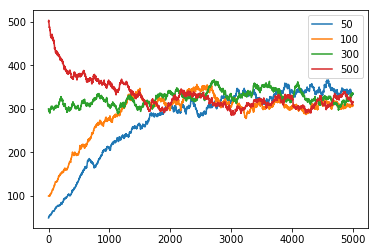

In [31]:
plt.plot(data50[0], data50[1], label="50")
plt.plot(data100[0], data100[1], label="100")
plt.plot(data300[0], data300[1], label="300")
plt.plot(data500[0], data500[1], label="500")
plt.legend()
plt.show()

In [26]:
"""
birth_rate = 3e-3
death_rate = 1e-5
birth_variance = 2e-2
death_variance = 1e-2
Отрезок [0;1]
"""

data500 = pd.read_csv("500.txt", sep="\n", header=None)
data400 = pd.read_csv("400.txt", sep="\n", header=None)
data100 = pd.read_csv("100.txt", sep="\n", header=None)


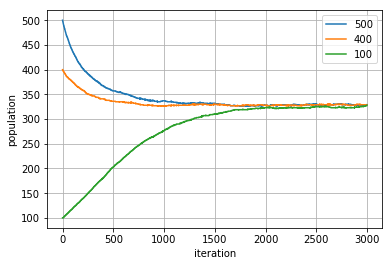

In [27]:
plt.plot(list(range((data500.shape[0]))), data500[0], label="500")
plt.plot(list(range((data400.shape[0]))), data400[0], label="400")
plt.plot(list(range((data100.shape[0]))), data100[0], label="100")
plt.ylabel('population')
plt.xlabel('iteration')
plt.legend()
plt.grid()
plt.show()

In [30]:
"""
birth_rate = 3e-3
death_rate = 1e-4
birth_variance = 2e-2
death_variance = 1e-2
Отрезок [0;1]
"""

data505 = pd.read_csv("505.txt", sep="\n", header=None)
data404 = pd.read_csv("404.txt", sep="\n", header=None)
data10 = pd.read_csv("10.txt", sep="\n", header=None)

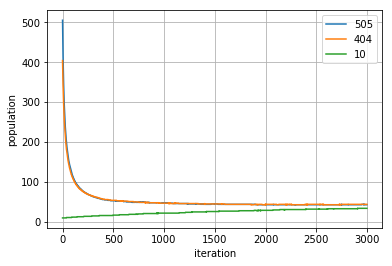

In [31]:
plt.plot(list(range((data505.shape[0]))), data505[0], label="505")
plt.plot(list(range((data404.shape[0]))), data404[0], label="404")
plt.plot(list(range((data10.shape[0]))), data10[0], label="10")
plt.ylabel('population')
plt.xlabel('iteration')
plt.legend()
plt.grid()
plt.show()

In [38]:
"""
birth_rate = 6e-3
death_rate = 1e-5
birth_variance = 2e-2
death_variance = 1e-2
Отрезок [0;1]
"""

data515 = pd.read_csv("515.txt", sep="\n", header=None)
data818 = pd.read_csv("818.txt", sep="\n", header=None)
data690 = pd.read_csv("690.txt", sep="\n", header=None)

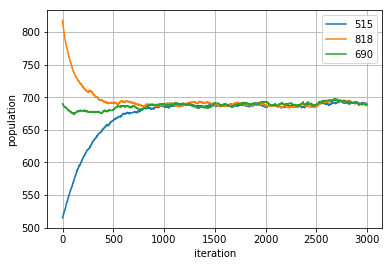

In [39]:
plt.plot(list(range((data515.shape[0]))), data515[0], label="515")
plt.plot(list(range((data818.shape[0]))), data818[0], label="818")
plt.plot(list(range((data690.shape[0]))), data690[0], label="690")
plt.ylabel('population')
plt.xlabel('iteration')
plt.legend()
plt.grid()
plt.show()